# TP1 : Traitement des données multimédia

### Exercise 1 :

In [215]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#### définir plot :

In [216]:
def plot(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

#### Image Load :

In [217]:
img = cv2.imread('./src/img.jpg')

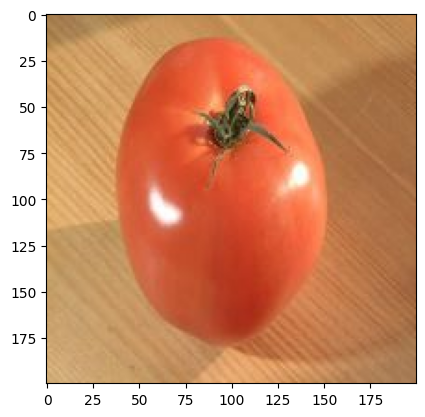

In [218]:
plot(img)

#### 2. Image properties

In [219]:
img_mat = cv2.Mat(img)

In [220]:
# shape of the image :
img_mat.shape

(200, 200, 3)

Here we have 200 rows, and 200 columns, the last number is number of channels means (RED, BLUE, GREEN).

In [221]:
# data type of the image :
img_mat.dtype

dtype('uint8')

This gives the data type of image, 'uint8' means is unsigned integer, image is coded in 8 bit.

#### 3. Image Hist :

##### a. Fist method :

In [277]:
def hists_by_channel(img, ch):
    img_ch = img[:,:,ch]
    return [img_ch[img_ch==i].sum() for i in range(255)]

In [278]:
hist_r = hists_by_channel(img, 0)
hist_g = hists_by_channel(img, 1)
hist_b = hists_by_channel(img, 2)

##### b. Plot Historgram using calcHist method :

In [199]:
hists = [cv2.calcHist([img],[i],None,[256],[0,256]) for i in range(3)]

In [279]:
hists_b, hists_g, hists_r = hists

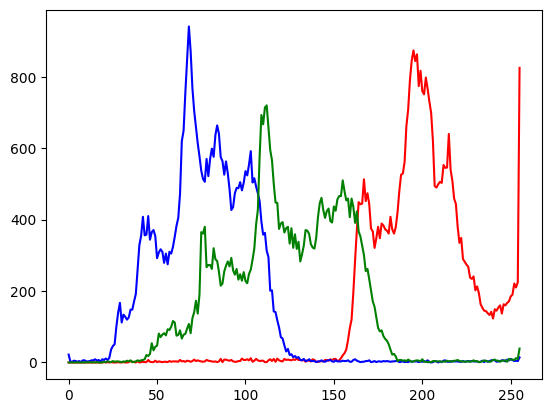

In [280]:
# Red channel, plot hist
plt.plot(hists_r, color="r")
plt.plot(hists_b, color="b")
plt.plot(hists_g, color="g")

##### Compare between Histograms :

In [154]:
# red with green
cv2.compareHist(hists_r, hists_g, cv2.HISTCMP_BHATTACHARYYA)

0.45667609408138726

In [155]:
# red with blue
cv2.compareHist(hists_r, hists_b, cv2.HISTCMP_BHATTACHARYYA)

0.559052880830733

In [156]:
# blue with green
cv2.compareHist(hists_b, hists_g, cv2.HISTCMP_BHATTACHARYYA)

0.8077275534874325

### Mean :

In [81]:
def mean(img ,ch):
    m,n = img.shape[:-1]
    return img[:, :, ch].sum() * (1/(m*n))

In [87]:
# mean of red channel :
mean(img, 0)

77.99985000000001

In [88]:
# mean of green channel :
mean(img, 1)

122.99627500000001

In [89]:
# mean of blue channel :
mean(img, 2)

200.00490000000002

### grayscale :

##### a. gray=(R+G+B)/3

In [128]:
def gray_img(img):
    img_g = img[:,:,0] + img[:,:,1] + img[:,:,2] 
    return img_g / 3

In [129]:
img_g = gray_img(img)

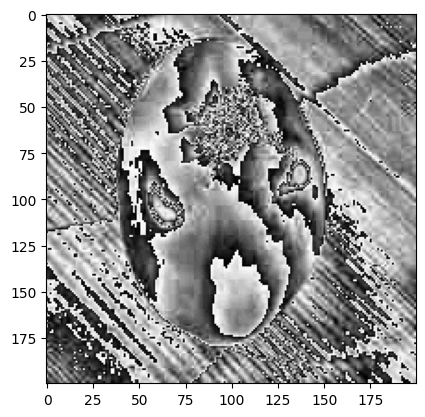

In [130]:
plt.imshow(img_g, cmap='gray')

 ##### b cvtColor

In [132]:
img_g1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

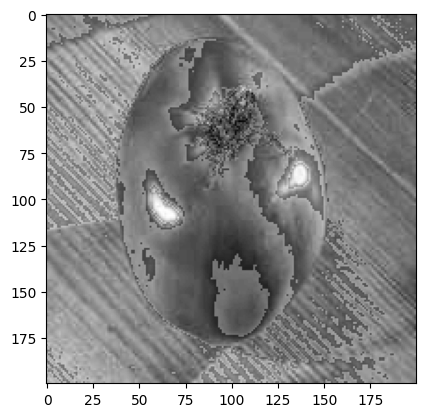

In [133]:
plt.imshow(img_g1, cmap='gray')

#### compare the results :

As we can see, the two images are different. When I checked the OpenCV documentation, I realized that they used the following formula to convert to grayscale: $gray = 0.299⋅R+0.587⋅G+0.114⋅B$

#### Mean Gray scale :

In [134]:
def mean_gray(img_g):
    m,n = img_g.shape
    return img_g.sum()/ (m*n)

In [135]:
mean_gra = mean_gray(img_g)
mean_gra

44.593516666666666

In [136]:
mean_gra1 = mean_gray(img_g1)
mean_gra1

135.18845

#### Save image : 

In [137]:
cv2.imwrite("./src/image_output.jpg", img_g1)

True

#### verify if the image is writed correclty :

In [144]:
img_output = cv2.imread("./src/image_output.jpg")

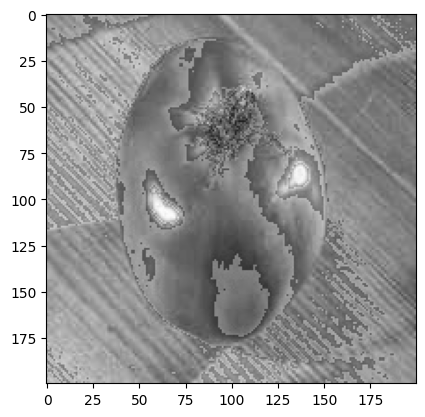

In [145]:
plt.imshow(img_output)